# <span style="color:Cyan;"> Explanation </span>


-  in the dataset mushrooms are classified as either edible or poisonous, where edible is denoted as 'e' and poisonous is denoted as 'p' in the data set.

-  We are going to build a model that can take some selected features and predict if a mushroom is edible or poisonous

-  Each character in the data set has some specific meaning, for example - in column (cap-shape) b stands for column bell, c = conical, f = flat and s = sunken.


-  This is a checklist which shows what each character means

   -  cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

   -  cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

   -  cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

   -  bruises?: bruises=t,no=f

   -  odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

   -  gill-attachment: attached=a,descending=d,free=f,notched=n

   -  gill-spacing: close=c,crowded=w,distant=d gill-size: broad=b,narrow=n

   -  gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

   -  stalk-shape: enlarging=e,tapering=t

   -  stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

   -  stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

   -  stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

   -  stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

   -  stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

   -  veil-type: partial=p,universal=u

   -  veil-color: brown=n,orange=o,white=w,yellow=y

   -  ring-number: none=n,one=o,two=t

   -  ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

   -  spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

   -  population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

   -  habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=dt


# <span style="color:Cyan"> Exploratory Data Analysis (EDA) </span>


## <span style="color:#00FF8B; font-size: 28px;"> Importing useful libraries for our data </span>


In [26]:
# لو اول مره ترن البروجكت ع الجهاز الغى الكومنت من ع الكود ده
"""
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install plotly
%pip install scikit-learn
%pip install nbformat

"""

# Manipulation
import pandas as pd
import numpy as np

# Graphs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.graph_objs as go
import plotly.express as px

# Notebook interacting
import nbformat

# Machine learning
import sklearn

# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


# Model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

## <span style="color:#00FF8B; font-size: 28px;"> Reading the data </span>


In [27]:
mush = pd.read_csv("mushrooms.csv")
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,p,k,y,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
10136,p,k,s,n,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
10137,p,x,y,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
10138,p,f,y,y,f,n,f,w,n,w,...,y,y,y,p,y,o,e,w,c,l


## <span style="color:#00FF8B; font-size: 28px;"> General Preprocessing </span>


In [28]:
mush.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
3,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
4,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [29]:
mush.tail(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
10135,p,k,y,e,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
10136,p,k,s,n,f,y,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
10137,p,x,y,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
10138,p,f,y,y,f,n,f,w,n,w,...,y,y,y,p,y,o,e,w,c,l
10139,p,x,y,c,f,m,a,c,b,w,...,y,c,c,p,w,n,n,w,c,d


In [30]:
mush["class"].unique()

array(['e', 'p'], dtype=object)

In [31]:
mush.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [32]:
mush.shape

(10140, 23)

In [33]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [34]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,10140,10140,10140,10140,10140,10140,10140,10140,10140,10140,...,10140,10140,10140,10140,10140,10140,10140,10140,10140,10140
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,5222,4312,4157,2938,5952,3748,9910,8624,6458,2680,...,6216,5947,5877,10140,9930,9464,4888,3390,5144,3619


## <span style="color:#00FF8B; font-size: 28px;"> Label encoding for all non numeric features </span>


We are going to encode all non-numerical features so they can be used in the model


In [35]:
mush_encoded = mush.copy()
le = LabelEncoder()
for col in mush_encoded.columns:
    mush_encoded[col] = le.fit_transform(mush_encoded[col])

mush_encoded.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3


In this data set feature scaling will not be much of a requirement as the features already have a low variance


In [36]:
mush_encoded.max()

class                        1
cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color                  11
stalk-shape                  1
stalk-root                   4
stalk-surface-above-ring     3
stalk-surface-below-ring     3
stalk-color-above-ring       8
stalk-color-below-ring       8
veil-type                    0
veil-color                   3
ring-number                  2
ring-type                    4
spore-print-color            8
population                   5
habitat                      6
dtype: int32

Some numeric statistics after the encoding


In [37]:
mush_encoded.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,10140.00000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,...,10140.000000,10140.000000,10140.000000,10140.0,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000,10140.000000
mean,0.48501,3.285404,1.908185,4.622091,0.413018,4.090335,0.977318,0.149507,0.363116,4.475049,...,1.649803,5.979586,5.964990,0.0,1.973373,1.051677,2.211045,3.842702,3.605621,1.611637
std,0.49980,1.622593,1.185253,2.599473,0.492400,2.274341,0.148896,0.356605,0.480922,3.620997,...,0.672502,1.782778,1.787966,0.0,0.220019,0.252987,1.846041,2.404957,1.216397,1.710438
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.00000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.00000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,3.000000
max,1.00000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Columns that were encoded


In [38]:
mush_encoded.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

All the columns were encoded because they all were of type object (string)


## <span style="color:#00FF8B; font-size: 28px;"> Visualizations -- Insights </span>


### <span style="color:#FFE527; font-size: 20px;">Configuring pylab settings</span>


In [39]:
params = {
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
pylab.rcParams.update(params)

### <span style="color:#FFE527; font-size: 20px;"> Count of poisonous vs edible - Insight 1 </span>


C:\Users\bokyb\AppData\Local\Temp\ipykernel_17300\4182560556.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




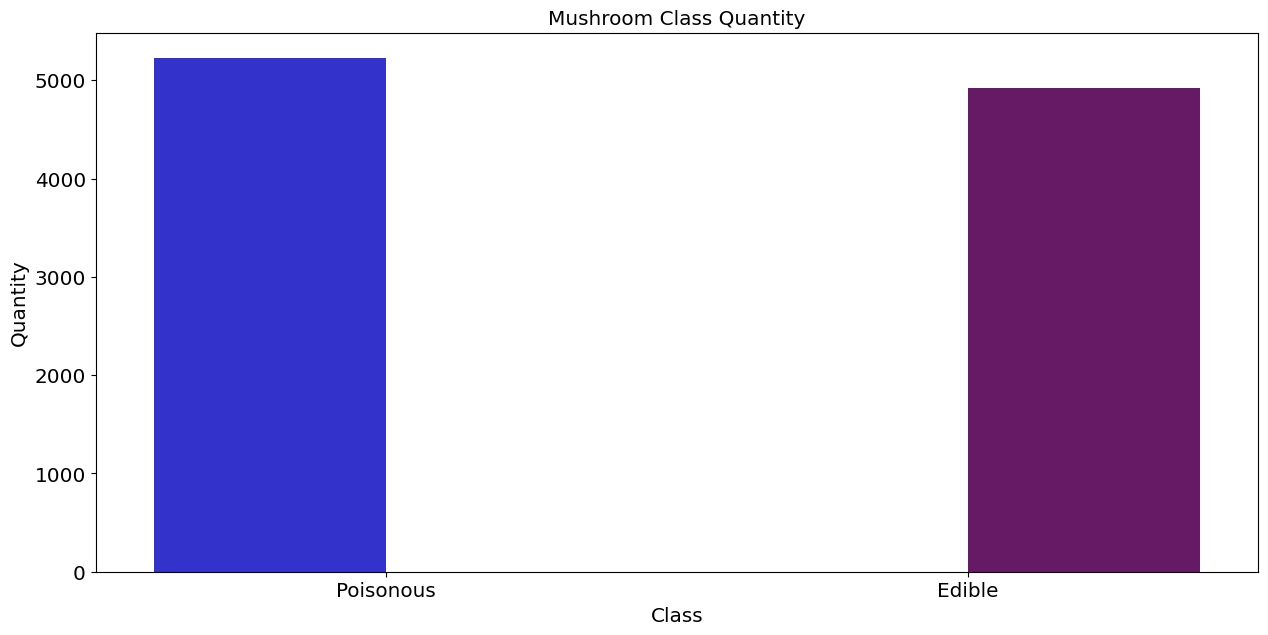

In [40]:
def plot_col(col, hue=None, labels=("Poisonous", "Edible"), data=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(
        x=col,
        hue=hue,
        palette=["blue", "purple"],
        saturation=0.6,
        dodge=True,
        data=data,
        ax=ax,
        legend=False,
    )

    ax.set(
        title=f"Mushroom {col.capitalize()} Quantity",
        xlabel=f"{col.capitalize()}",
        ylabel="Quantity",
    )
    if labels is not None:
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels)
    if hue is not None:
        ax.legend(labels, loc=0)


# Example usage
plot_col(col="class", labels=("Poisonous", "Edible"), data=mush_encoded)

# Display the plot
plt.show()

There are more poisonous mushrooms in the dataset than the edible ones


In [41]:
labels = ["Poison", "Edible"]
values = mush_encoded["class"].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(
    hoverinfo="label+percent",
    textinfo="value",
    textfont_size=20,
    marker=dict(colors=["CAF4FF", "A0DEFF"], line=dict(color="#FFFFFF", width=3)),
)
fig.show()

There is nearly a 50% chance of picking either class


### <span style="color:#FFE527; font-size: 20px;"> Distribution of cap color - Insight 2 </span>


C:\Users\bokyb\AppData\Local\Temp\ipykernel_17300\2296874429.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\bokyb\AppData\Local\Temp\ipykernel_17300\2296874429.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



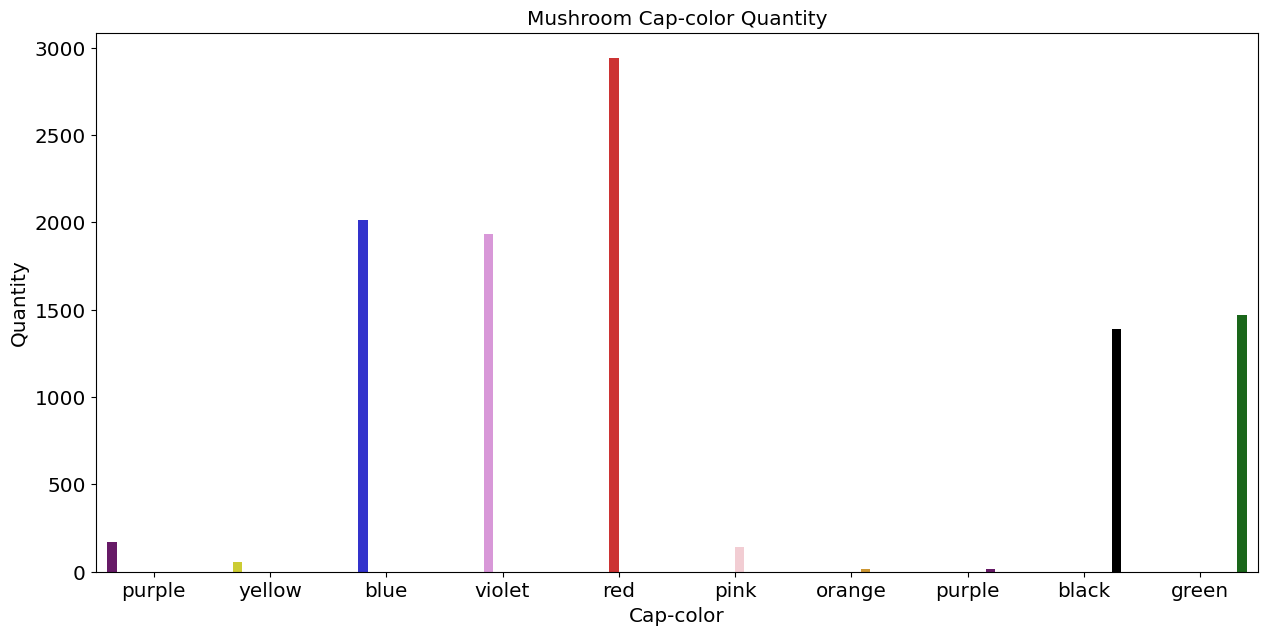

In [42]:
def plot_col(col, hue=None, labels=None, data=None):
    color_palette = [
        "purple",
        "yellow",
        "blue",
        "violet",
        "red",
        "pink",
        "orange",
        "purple",
        "black",
        "green",
    ]

    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(
        x=col,
        hue=hue,
        palette=color_palette,
        saturation=0.6,
        dodge=True,
        data=data,
        ax=ax,
    )

    ax.set(
        title=f"Mushroom {col.capitalize()} Quantity",
        xlabel=f"{col.capitalize()}",
        ylabel="Quantity",
    )

    if labels is not None:
        ax.set_xticklabels(labels)

    if hue is not None:
        ax.legend(labels=color_palette, loc=0)


# Example usage
color_dict = [
    "purple",
    "yellow",
    "blue",
    "violet",
    "red",
    "pink",
    "orange",
    "purple",
    "black",
    "green",
]
plot_col(col="cap-color", labels=color_dict, data=mush_encoded)

# Display the plot
plt.show()

Red (4), Violet (3) and Blue (2) Mushrooms are more in quantity than other colors of mushrooms and are above 1000 in quantity


### <span style="color:#FFE527; font-size: 20px;"> Distribution of cap surface types - Insight 3 </span>


C:\Users\bokyb\AppData\Local\Temp\ipykernel_17300\1072070817.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



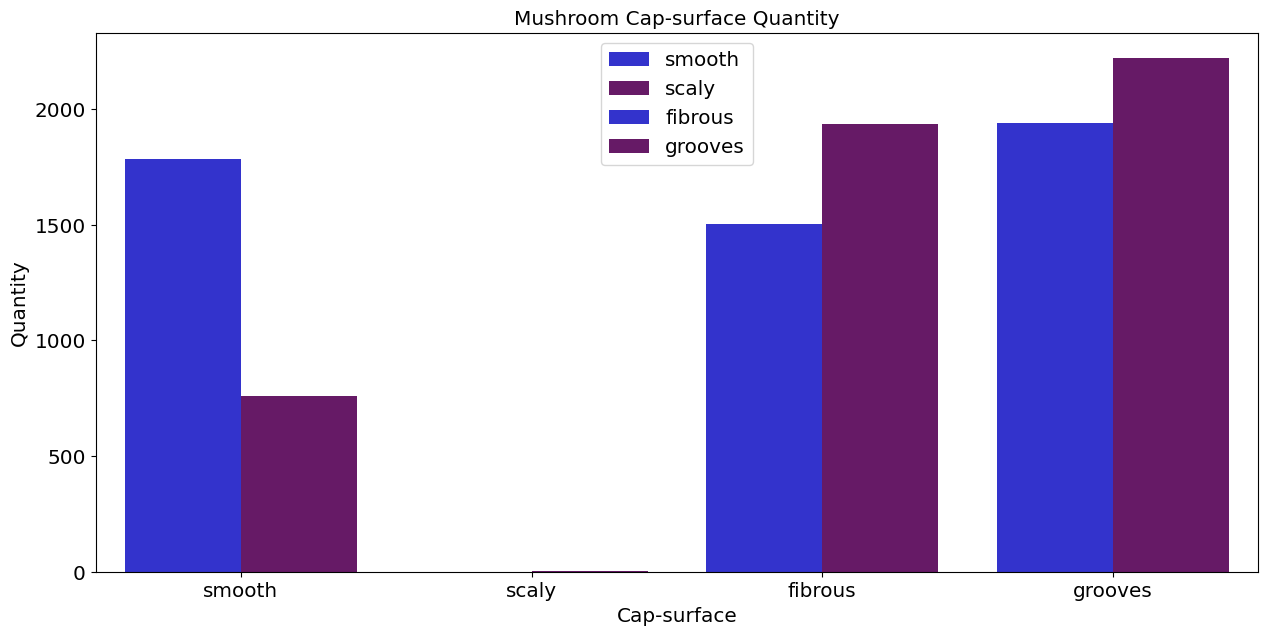

In [43]:
def plot_col(col, hue=None, color=["blue", "purple"], labels=None, data=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(
        x=col, hue=hue, palette=color, saturation=0.6, dodge=True, data=data, ax=ax
    )

    ax.set(
        title=f"Mushroom {col.capitalize()} Quantity",
        xlabel=f"{col.capitalize()}",
        ylabel="Quantity",
    )

    if labels is not None:
        ax.set_xticklabels(labels)

    if hue is not None:
        ax.legend(labels=("smooth", "scaly", "fibrous", "grooves"), loc=0)


# Example usage
surface_dict = {"smooth": "s", "scaly": "y", "fibrous": "f", "grooves": "g"}
plot_col(col="cap-surface", hue="class", labels=surface_dict, data=mush_encoded)

# Display the plot
plt.show()

Scaly Cap-surface (1) mushrooms are very low in quantity in the sample, other categories of cap-surface are in considerable number


### <span style="color:#FFE527; font-size: 20px;"> Distribution of mushrooms habitat - Insight 4</span>


In [44]:
# Plot to understand the habitat of different mushrooms
labels = ["Woods", "Grasses", "Paths", "Leaves", "Urban", "Meadows", "Waste"]
values = mush_encoded["habitat"].value_counts()
colors = ["#DEB887", "#778899", "#B22222", "#FFFF00", "#F8F8FF", "#FFE4C4", "#FF69B4"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            # marker_colors=labels,
            pull=[0.1, 0, 0, 0, 0.2, 0, 0],
        )
    ]
)
fig.update_traces(
    title="Mushrooms Habitat Percentage",
    hoverinfo="label+value",
    textinfo="percent",
    opacity=0.9,
    textfont_size=25,
    marker=dict(colors=colors),
)
fig.show()

Woods and Grasses Mushrooms are the most frequent habitat of mushrooms


### <span style="color:#FFE527; font-size: 20px;"> Distribution of mushrooms color - Insight 5</span>


In [45]:
labels = [
    "Brown",
    "Gray",
    "Red",
    "Yellow",
    "White",
    "Buff",
    "Pink",
    "Cinnamon",
    "Purple",
    "Green",
]
values = mush_encoded["cap-color"].value_counts()
colors = [
    "#DEB887",
    "#778899",
    "#B22222",
    "#FFFF00",
    "#F8F8FF",
    "#FFE4C4",
    "#FF69B4",
    "#F0DC82",
    "#C000C5",
    "#228B22",
]

fig = go.Figure(
    data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0])]
)

fig.update_traces(
    title="Mushrooms Color Quantity",
    hoverinfo="label+percent",
    textinfo="value",
    opacity=0.9,
    textfont_size=25,
    marker=dict(colors=colors),
)

fig.show()

All colors have a decent number of samples , with brown & gray having a bit more


## <span style="color:#00FF8B; font-size: 28px;"> PCA (Principal Component Analysis) </span>


### <span style="color:#FFE527; font-size: 20px;"> Figuring out a good n_components </span>


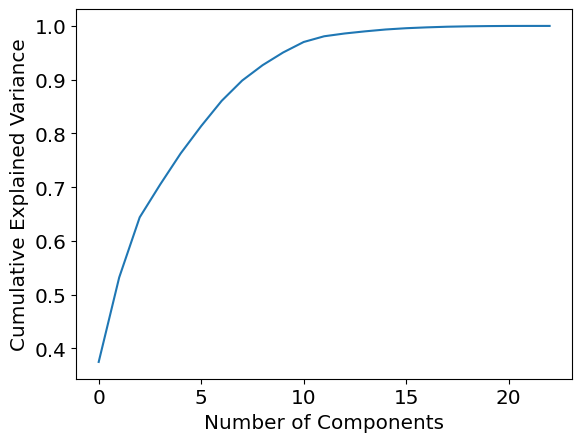

In [46]:
# Get the 22 features
mush_encoded_features = mush_encoded.drop(["class"], axis=1)

# Draw the cumulative variance graph

pca = PCA().fit(mush_encoded)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

From the graph, we can see that the cumulative variance explained is approximately constant when n is bigger than 10, so we can choose like 12 features as a good representation


### <span style="color:#FFE527; font-size: 20px;"> Applying PCA to the mushrooms data </span>


In [47]:
# Perform PCA
n_components = 12  # Note if we set the n_components to 22 no reduction will be made BUT the data will be centered around the (0,0) and might also be scaled by dividing each feature by its SD

pca = PCA(n_components=n_components)
mush_encoded_pca = pca.fit_transform(mush_encoded_features)

# Generate column names dynamically
column_names = [f"PC{i}" for i in range(1, n_components + 1)]

# Convert transformed data to a DataFrame with appropriate column names
mush_encoded_pca_df = pd.DataFrame(mush_encoded_pca, columns=column_names)
mush_encoded_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,3.002579,5.364892,-1.347101,-1.141750,-0.171584,-0.529319,2.366642,-0.096803,-0.084028,-0.125804,-1.670856,0.155641
1,2.510109,3.261355,-2.650322,1.275340,1.128346,-0.623683,-2.699145,-0.180230,-0.013552,0.132614,-1.132139,0.216183
2,-1.143462,-0.770913,-1.189474,-1.945557,-1.315332,2.191960,0.260524,3.399995,-0.313561,-1.635409,-1.834982,-0.416758
3,4.091069,5.086140,-1.307410,-1.240246,-0.124768,-0.303457,2.136650,-0.086728,-0.089004,-1.213063,-1.177214,0.497293
4,1.516468,6.310479,-1.036491,-0.697181,2.093802,-1.569956,-2.635765,0.192132,0.010582,0.158995,-1.524254,0.271477
...,...,...,...,...,...,...,...,...,...,...,...,...
10135,-7.563650,-1.639401,-0.830159,0.771292,0.745221,1.468261,-0.977327,-1.212287,0.751452,-0.508511,0.204713,-0.068494
10136,-6.977861,-0.314097,-1.257664,1.654180,-0.099683,1.690880,-0.822794,-1.317475,0.780927,0.530194,0.261081,-0.166257
10137,-6.026905,1.075872,0.645108,-1.639980,3.393347,0.425599,2.455520,0.253198,0.655080,-0.131303,0.520360,0.236223
10138,2.787570,-0.100187,-6.858545,4.537827,0.146296,0.421906,1.554094,2.374053,-0.307809,-0.852678,0.764610,-1.093888


# <span style="color:cyan">Classification - SVM</span>


## <span style="color:#00FF8B; font-size: 28px;"> SVM - With Hyper Parameter Using Grid Search</span>


longer version of tuning , we are going to use grid search to find the best hyper parameters

Grid search uses cross validation technique to compare between (different sets of parameters) (grid)


In [48]:
""" # class column is taken as a numpy array
y = mush_encoded["class"].values

# All the features are separated from our target value or label and stored in x
x = mush_encoded_pca

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(

    x, y, random_state=42, test_size=0.25

)

# Define the parameter grid to search, values to be tested
param_grid = {

    "C": [0.1, 1, 10, 100],  # Regularization parameter

    "gamma": ["scale", "auto", 0.1, 1],  # Kernel coefficient

    "kernel": ["linear", "rbf", "poly"],  # Kernel type

}

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Initialize GridSearchCV with the SVM classifier and parameter grid
grid_search = GridSearchCV(
    svm, param_grid, cv=5
)  # cv = the number subsets used for cross validation

# Perform grid search
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score found
print("Best Cross-validation Score:", grid_search.best_score_)

# Retrain the model with the best parameters found on the full training set
best_svm = grid_search.best_estimator_

best_svm.fit(x_train, y_train)

# Finally, print the test accuracy of the best model
print(

    "Test Accuracy after Grid Search: {}%".format(

        best_svm.score(x_test, y_test) * 100, 2

    )

)
 """

' # class column is taken as a numpy array\ny = mush_encoded["class"].values\n\n# All the features are separated from our target value or label and stored in x\nx = mush_encoded_pca\n\n# Split the data into training and test sets\nx_train, x_test, y_train, y_test = train_test_split(\n\n    x, y, random_state=42, test_size=0.25\n\n)\n\n# Define the parameter grid to search, values to be tested\nparam_grid = {\n\n    "C": [0.1, 1, 10, 100],  # Regularization parameter\n\n    "gamma": ["scale", "auto", 0.1, 1],  # Kernel coefficient\n\n    "kernel": ["linear", "rbf", "poly"],  # Kernel type\n\n}\n\n# Initialize the SVM classifier\nsvm = SVC(random_state=42)\n\n# Initialize GridSearchCV with the SVM classifier and parameter grid\ngrid_search = GridSearchCV(\n    svm, param_grid, cv=5\n)  # cv = the number subsets used for cross validation\n\n# Perform grid search\ngrid_search.fit(x_train, y_train)\n\n# Print the best parameters found\nprint("Best Parameters:", grid_search.best_params_)\n\n

Shorter version of tuning less testing parameters


In [49]:
# class column is taken as a numpy array
y = mush_encoded["class"].values

# All the features are separated from our target value or label and stored in x
x = mush_encoded_pca

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42, test_size=0.25
)

# Define the parameter grid to search, values to be tested
param_grid = {
    "C": [0.1, 0.01],  # Reduced values for C
    "gamma": ["scale", 0.1],  # Reduced values for gamma
    "kernel": ["linear", "rbf"],  # Limited kernel types
}

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Initialize GridSearchCV with less options
grid_search = GridSearchCV(
    svm, param_grid, cv=3
)  # Here we reduced the number of subsets CV for cross validation

# Perform grid search
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best cross-validation score found
print("Best Cross-validation Score:", grid_search.best_score_)

# Retrain the model with the best parameters found on the full training set
best_svm = grid_search.best_estimator_
best_svm.fit(x_train, y_train)

# Finally, print the test accuracy of the best model
print(
    "Test Accuracy after Grid Search: {}%".format(
        best_svm.score(x_test, y_test) * 100, 2
    )
)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-validation Score: 0.9852728468113083
Test Accuracy after Grid Search: 98.8560157790927%


## <span style="color:#00FF8B; font-size: 28px;"> SVM - No Tuning </span>


In [50]:
# Separate target and features
y = mush_encoded["class"].values
x = mush_encoded_pca

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42, test_size=0.3
)

# Initialize SVM classifier with preferred parameters
svm = SVC(C=0.5, gamma="scale", kernel="rbf", random_state=42)
""" 
C -> lower value -> softer margin -> allows for misclassifications on train but generalize well

gamma -> determines the influence of each training sample and affects the flexibility of the decision boundary,
    smaller gamma value implies a larger influence radius for each support vector, resulting in a smoother decision boundary. 
    Conversely, a larger gamma value narrows the influence radius, leading to a more complex and tightly fitted decision boundary
    
kernel -> rbf is commonly used due to its flexibility in capturing nonlinear decision boundaries.
"""

# Train the SVM classifier
svm.fit(x_train, y_train)

# Calculate and print test accuracy
test_accuracy = svm.score(x_test, y_test) * 100
print("Test Accuracy: {}%".format(test_accuracy))

Test Accuracy: 98.81656804733728%
